<h1>Análisis de las obras de Gabriel García Márquez</h1>

<h2>"Cien años de soledad", "El amor en los tiempos del cólera", "Del amor y otros demonios" y "Crónicas de una muerte anunciada"</h2>

<p>El Machine Learning es una herramienta estadística muy interesante que nos ha permitido incluso ver los patrones detras del lenguaje humano, hoy se va a utilizar un modelo pre-trained de trabajos previos para la clasificación de sentimientos de estas cuatro importantes novelas del famoso autor ¿Qué crees que pasaría un computador al estas obras? ¿Pensaría que son obras muy positivas o negativas? Bueno, hoy vamos a saberlo.</p>

<h3>1. Permiso de acceso al Drive:</h3>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h3>2. instalación de paquetes necesarios para el NPL:</h3>

In [2]:
!pip install --user -U nltk
!pip install tweet-preprocessor

Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.4.5)


<p>Se va a hacer web scraping así que se requieren librerias como bs4 y request, también se debe procesas el texto así que se importan librerias como nltk, que es muy famosa.</p>

<h3>3. Importación de librerias necesarias:</h3>

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk as nl
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import preprocessor as p
import re, string
from sklearn.externals import joblib
from joblib import dump, load
from sklearn.metrics import accuracy_score
nl.download('stopwords')
nl.download('punkt')
nl.download('wordnet')


stopword = stopwords.words('spanish')
snowball_stemmer = SnowballStemmer('spanish')
wordnet_lemmatizer = WordNetLemmatizer()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<p>Se proporcionan las url de los tres libros, y estos se van a almacenar en un diccionario. Se debe notar que se esta subdividiendo en oraciones los textos para luego ser procesados. Posiblemente en un futuro se usen estos datos para hacer un generador de texto.</p>

<h3>4. Web scraping de los libros en cuestión</h3>

In [0]:
urls = ["https://archive.org/stream/ElAmorEnLosTiemposDelColera/GarciaMarquezGabriel-ElAmorEnLosTiemposDelColera_djvu.txt", "https://archive.org/stream/AcervoHermeneuticaGarciaDelAmorYOtrosDemoniosGGarciaMarquez/acervo_hermeneutica_garcia_Del%20amor%20y%20otros%20demonios_G%20Garcia%20Marquez_djvu.txt", "https://archive.org/stream/GarciaMarquezGabrielCienAnosDeSoledad1/garcia-marquez-gabriel-cien-anos-de-soledad1_djvu.txt","https://archive.org/stream/CronicasDeUnaMuerteAnunciada_14/GabrielGarcaMrquez-CrnicaDeUnaMuerteAnunciada_djvu.txt"]
books = ["El amor en los tiempos del cólera", "Del amor y otros demonios", "Cien años de soledad", "Crónicas de una muerte anunciada"]

def booksObtainer(url):
  r = requests.get(url).text
  soup = BeautifulSoup(r, "lxml")
  text = str(soup.find_all('pre')[0])
  return text
dicty = {}
for url, book in zip(urls,books):
  dicty[book] = booksObtainer(url)

for dic in dicty:
  a_list = nl.tokenize.sent_tokenize(dicty[dic])
  dicty[dic] = [dicty[dic],a_list]


<h3>5. Procesamiento de texto</h3>

In [0]:
def transformer(text):
  text=str(text).replace("<pre>","")
  text= p.clean(text)
  text = re.sub(r'\W+',' ',text) 
  text = text.lower()
  word_tokens = nl.word_tokenize(text)
  text = [word for word in word_tokens if word not in stopword]
  text = [snowball_stemmer.stem(word) for word in text]
  text = ' '.join([str(elem) for elem in text])
  text = text.replace("ó","o")
  text = text.replace("é","e")
  text = text.replace("í","i")
  text = text.replace("ú","u")
  text = text.replace("ñ","n")
  return text
  
for book in dicty:
  for i in range(0,len(dicty[book][1])):
    dicty[book][1][i] = transformer(dicty[book][1][i])

<p>Se van a analizar los textos así que para ellos se van a usar modelos pre-trained de proyectos pasados</p>

<h3>6. Llamado a pre-trained models.</h3>

In [30]:
filename = '/content/gdrive/My Drive/Colab Notebooks/tweets/models/weights/weights_tfidf.joblib'
load_tfidf = joblib.load(filename)
filename = '/content/gdrive/My Drive/Colab Notebooks/tweets/models/weights/weights_labelencoder.joblib'
load_labeler = joblib.load(filename)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<p>Se se aplican los modelos oración a oración clasificandolas, con cada modelo. Para luego ser visualizadas. Por lo general, los modelos de NLP son muy multidimensionales, lo que implica que su visualización es imposible así que se hace necesario disminuir su dimensionalidad, para ellos se usa el PCA, a dos dimensiones.</p>
<h3>7. Implementación de los modelos y gráficación de resultados</h3>

In [32]:
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

pca = PCA(n_components=2)


models = ['model_SoportVectorMachine.joblib', 'model_RandomForestClassifier.joblib', 'model_QuadraticDiscriminantAnalysis.joblib', 'model_MultinomialNaiveBayes.joblib', 'model_MultilayerPerceptron.joblib', 'model_GaussianNaiveBayes.joblib']

load_models = []

for model in models:
  load_models.append(joblib.load('/content/gdrive/My Drive/Colab Notebooks/tweets/models/supervised/'+model))

def graph(texto):
  X=load_tfidf.transform(dicty[texto][1]).toarray()
  X_pca = pca.fit_transform(X)
  fig = plt.figure(figsize=(20, 15))
  fig.suptitle('Aplicación de modelos a '+texto, fontsize = 16)
  for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    if (i%2==0):
      label = models[int((i/2))].replace(".joblib","")
      y=load_models[int((i/2))].predict(X)
      plt.title(label)
      plt.scatter(X_pca[y==0, 0],X_pca[y==0, 1], color = 'red', label = 'Negativa')
      plt.scatter(X_pca[y==1, 0],X_pca[y==1, 1], color = 'blue', label = 'Neutra')
      plt.scatter(X_pca[y==2, 0],X_pca[y==2, 1], color = 'green', label = 'Positiva')
      plt.legend(loc='upper right')
    if (i%2==1):
      ett = load_labeler.inverse_transform(y)
      plt.hist(ett)
      plt.title(label)
    plt.subplots_adjust(hspace=0.4, wspace = 0.4)
    fig.savefig('/content/gdrive/My Drive/Colab Notebooks/model_app'+texto+'.png')


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results

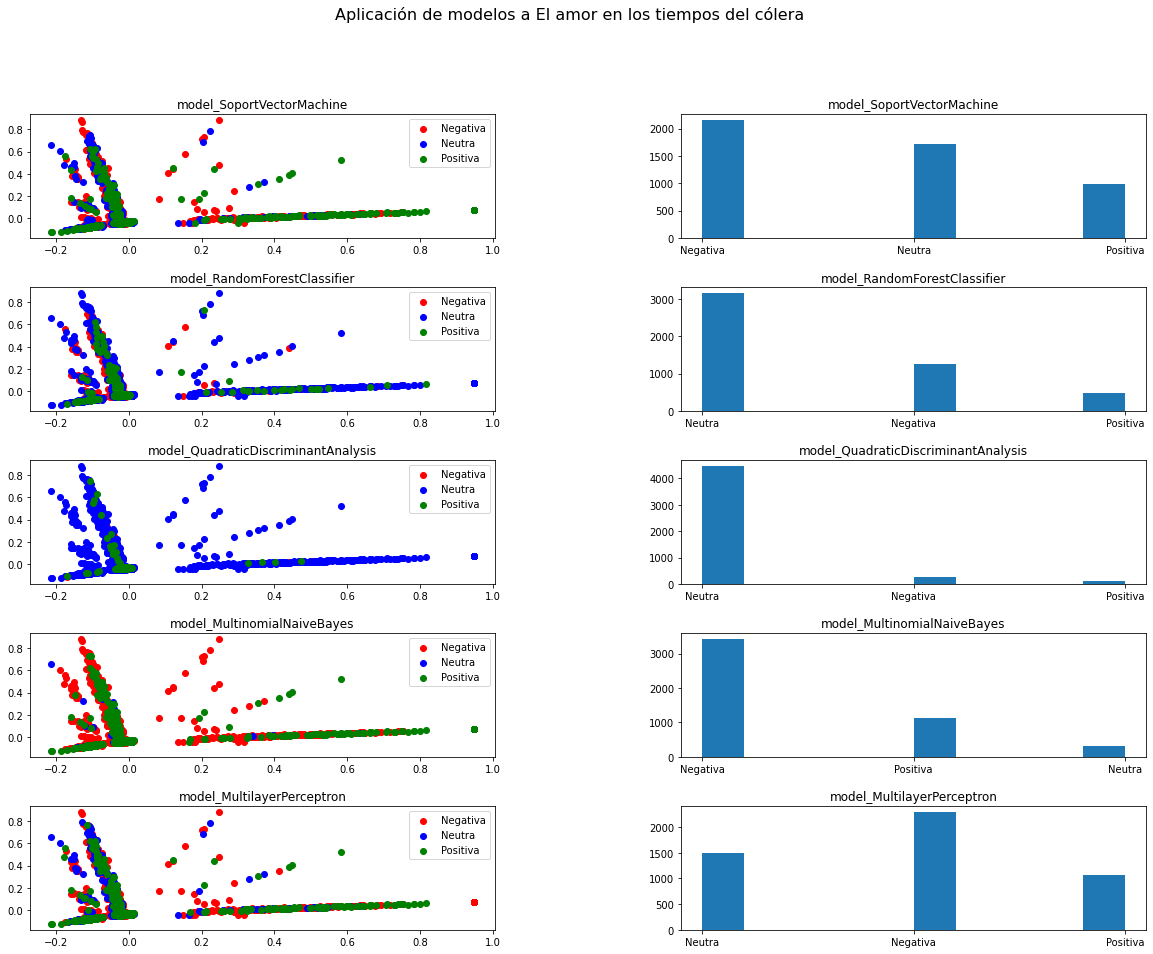

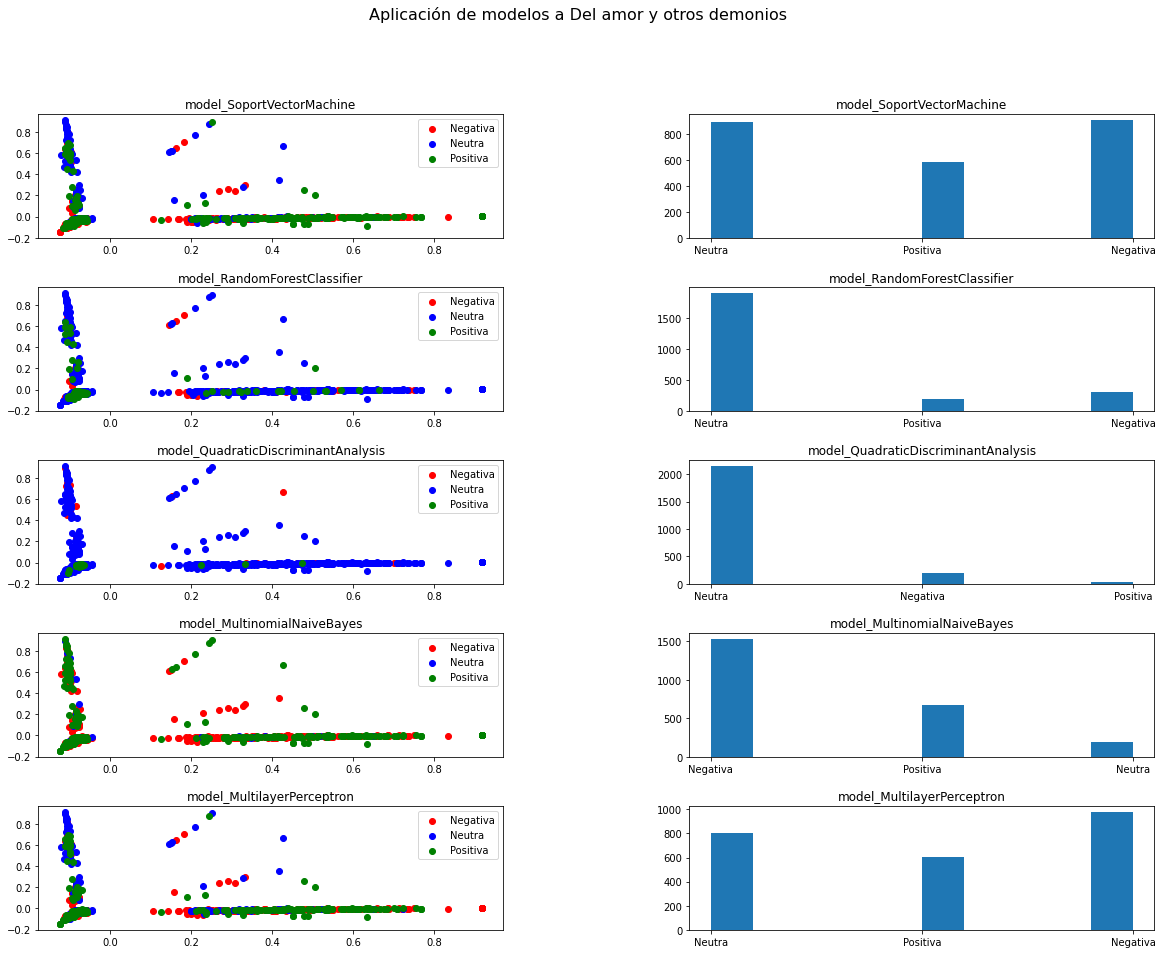

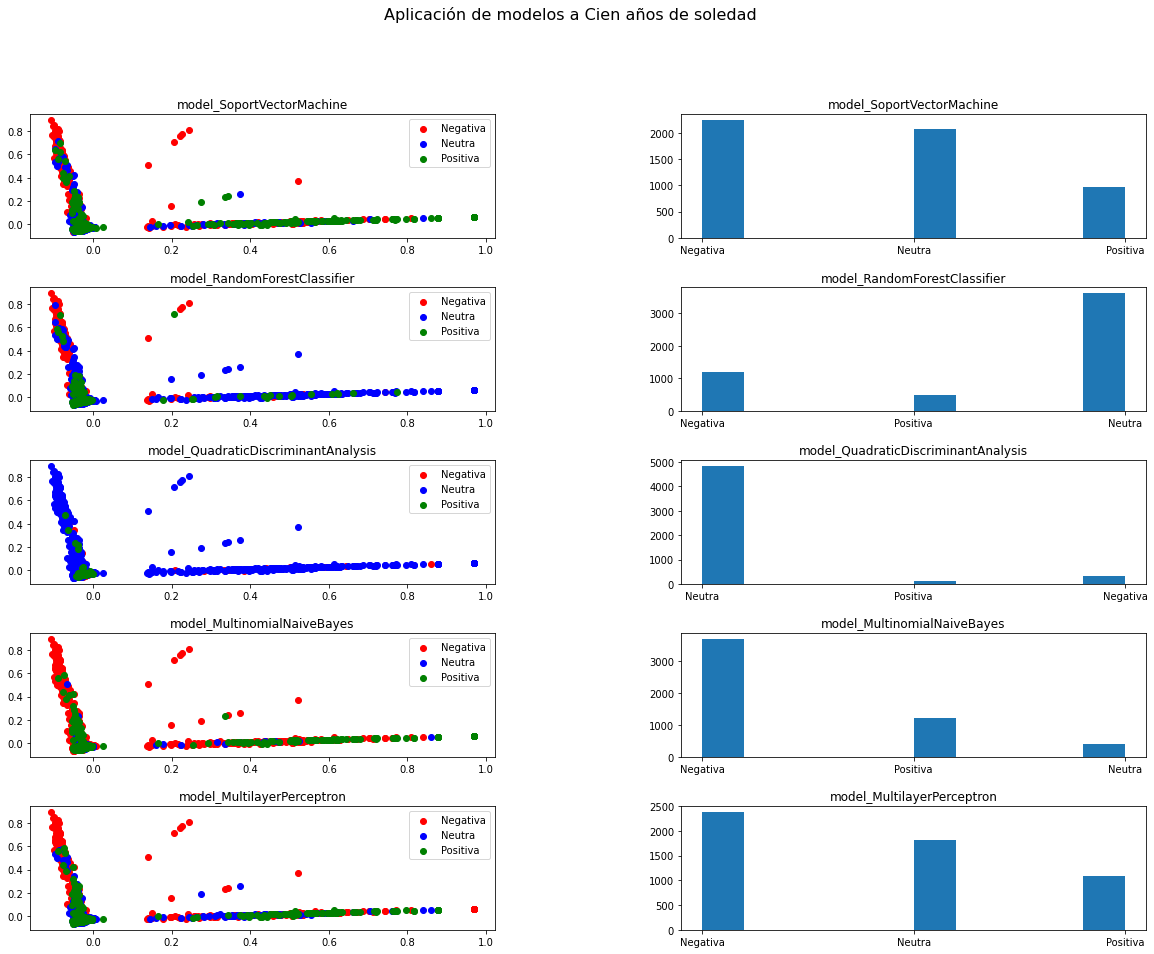

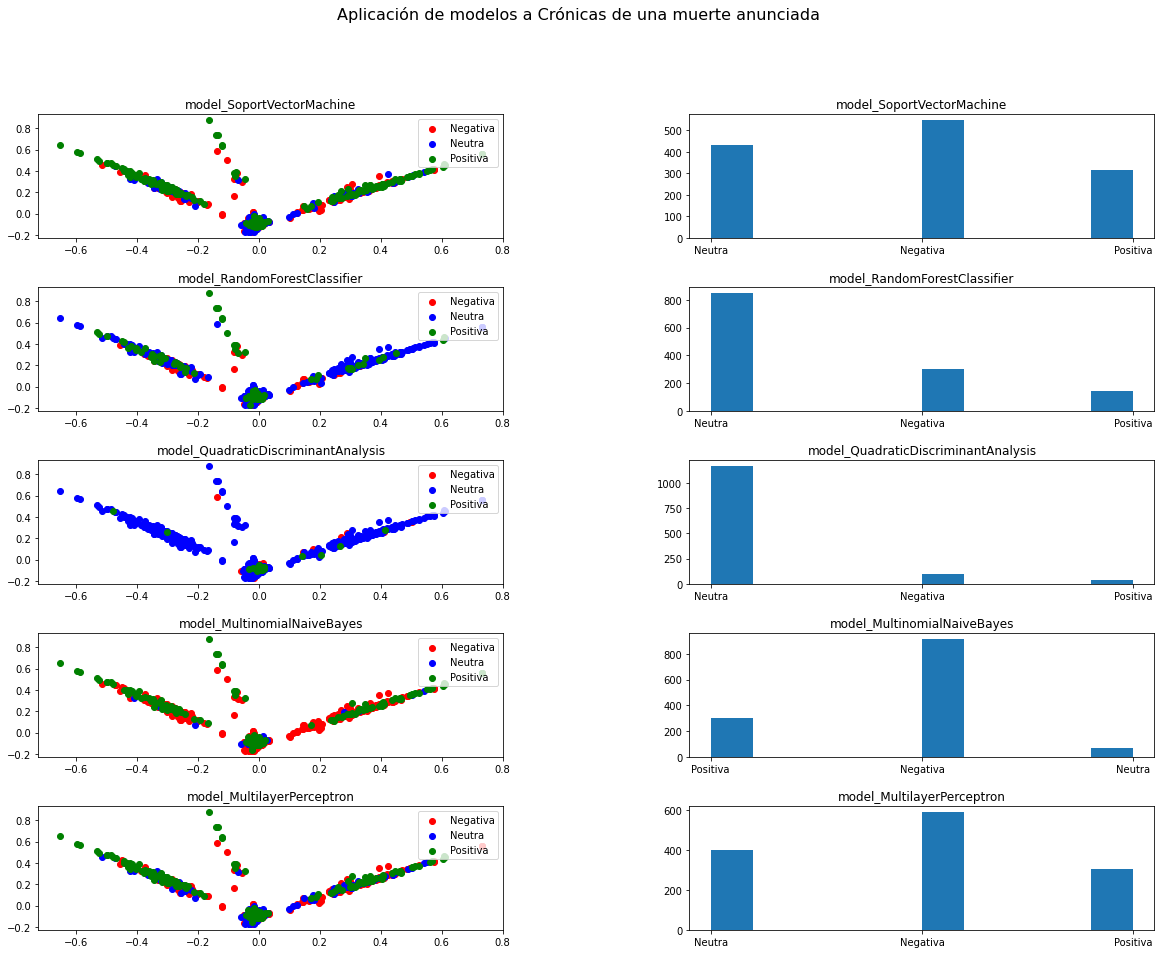

In [33]:
for dic in dicty:
  graph(dic)

<h3>8. No se debe desaprovechar la oportunidad de hacer unos buenos wordclouds.</h3>

<Figure size 1080x1080 with 0 Axes>

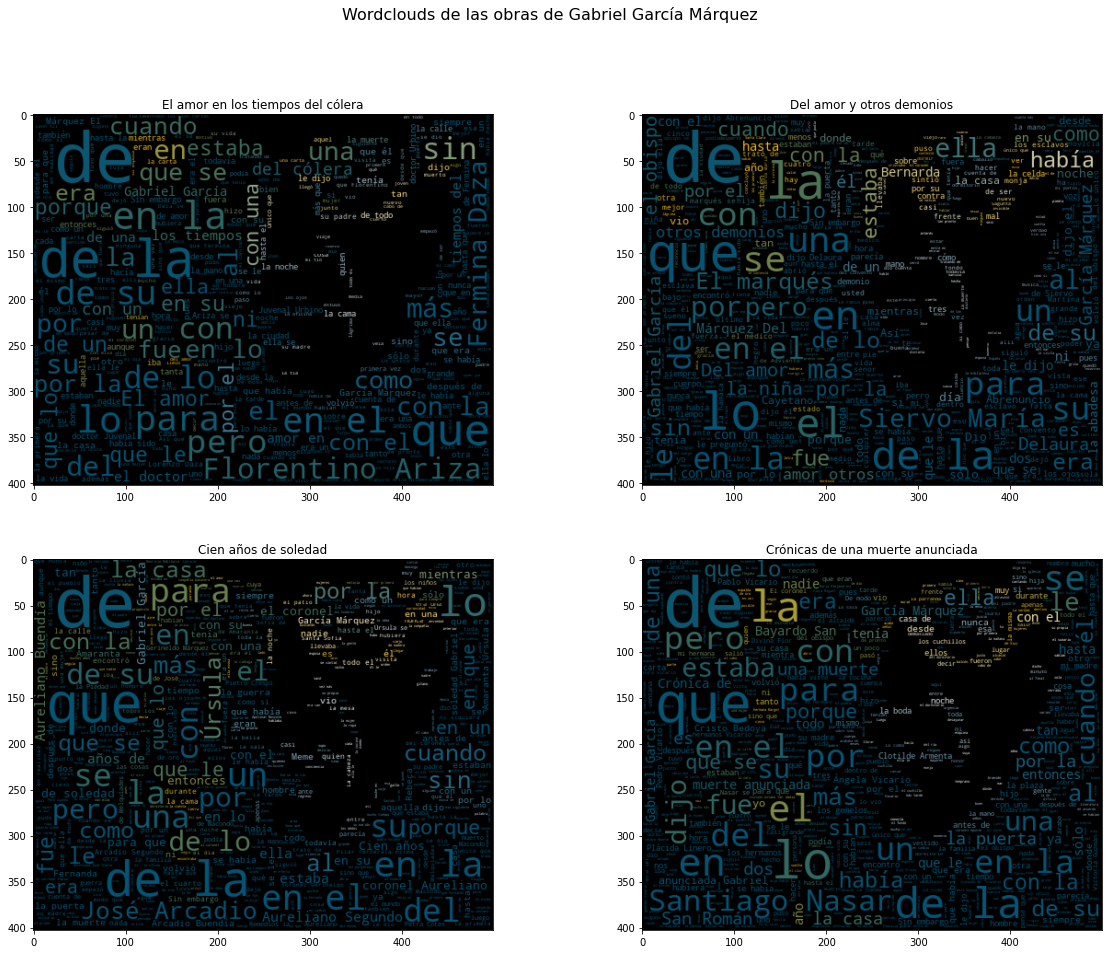

In [34]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image
import os
fig = plt.figure(figsize=(15, 15))

def transform_format(val):
  if (val == 0.):
    return 255.
  else:
    return val

col = np.array(Image.open(path.join('/content/gdrive/My Drive/Colab Notebooks/folium/', "Gabriel-García-Márquez-Lengua.jpg")))
transformed_col = np.ndarray((col.shape[0],col.shape[1],col.shape[2]), np.int32)
for i in range(col.shape[0]):
  for j in range(col.shape[1]):
    for k in range(col.shape[2]):
      transformed_col[i,j,k] = transform_format(col[i,j,k])

fig = plt.figure(figsize=(20, 15))
fig.suptitle('Wordclouds de las obras de Gabriel García Márquez', fontsize = 16)
i=1

for dic in dicty:
  plt.subplot(2, 2, i)
  wordcloud = WordCloud(width=1200, height=600, max_words=1000000, mask=transformed_col,max_font_size=75, random_state=42).generate(dicty[dic][0])
  image_colors = ImageColorGenerator(col)
  plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
  plt.title(dic)
  i+=1

fig.savefig('/content/gdrive/My Drive/Colab Notebooks/wordcloud.png')


<h3> Conclusión </h3>

<p>Sorprendentemente, la mayoría de las obras de nuestro querido Gabo son calificadas como negativas o neutras por los modelos, esto es de esperarse debo alto contenido trágico de las historias. También se nota que las palabras más frecuentes utilizadas son el nombre de sus personajes, y muchos conectores (además de las stopwords, claro esta).</p>